In [23]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt

from roc_evals import *

In [13]:
cen_normal = "cenarios_cba/cen_nova_versao/normal/"
cen_media2 = "cenarios_cba/cen_nova_versao/media2/"
cen_media5 = "cenarios_cba/cen_nova_versao/media5/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

In [5]:
#defining ref def 

col_labels = ['xmeas%02d_low' % x for x in [1,2,3,8,9,21]]+ ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]] 
df_mat = np.zeros([12,12], dtype=int)

ref_df = pd.DataFrame(df_mat, columns = col_labels, index=col_labels)
ref_df.loc['xmeas01_low'][['xmeas21_high', 'xmeas09_low']] = [1,1]
ref_df.loc['xmeas09_low']['xmeas21_high'] = 1

ref_df.loc['xmeas01_high'][['xmeas21_low', 'xmeas09_high']] = [1,1]
ref_df.loc['xmeas09_high']['xmeas21_low'] = 1

In [73]:
def eval_save_metrics(path_cen, path_cen_rate):
    all_settings = ['k%d_l%d_h%d' %(x,y,z) for z in [1,2,3] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6]) ]
    fp_rates = []
    tp_rates = []
    precision_vals = []
    for setting in (all_settings):
        conf = generate_conf_df(pd.read_csv(path_cen+setting+"_sel_corrs.csv", index_col=0), ref_df)
        conf.to_csv(path_cen_rate+"conf_"+setting+".csv")
        
        df_met = pd.DataFrame([[tp_rate(conf*100), fp_rate(conf*100), precision(conf*100)]], columns = ['tp_rate', 'fp_rate', 'precisao'])
        df_met.to_csv(path_cen_rate+"metricas_"+setting+".csv")
        
        fp_rates.append(fp_rate(conf)*100)
        tp_rates.append(tp_rate(conf)*100)
        precision_vals.append(precision(conf)*100)
    df_all_sets = pd.DataFrame({'tp_rates': tp_rates, 'fp_rates': fp_rates, 'precision_vals': precision_vals})
    df_all_sets.to_csv(path_cen_rate+'all_metrics.csv')
        #print(setting,df_met*100)


In [74]:
eval_save_metrics(cen_normal, cen_normal_rate)
eval_save_metrics(cen_media2, cen_media2_rate)
eval_save_metrics(cen_media5, cen_media5_rate)

In [97]:
def plot_rocs(path_cen_rate):
    all_settings = ['k%d_l%d_h%d' %(x,y,z) for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])  for z in [1,2,3]]
    df_met = pd.read_csv(path_cen_rate+"all_metrics.csv", index_col=0)
    for i in np.arange(0,3):
        plt.plot(df_met['fp_rates'][i*6:(i+1)*6], df_met['tp_rates'][i*6:(i+1)*6])
        plt.show()



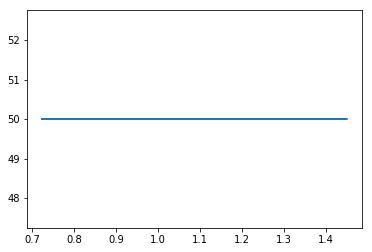

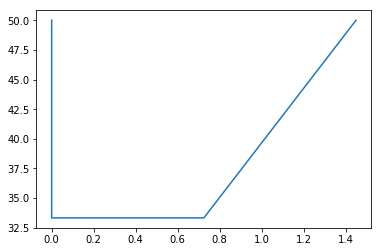

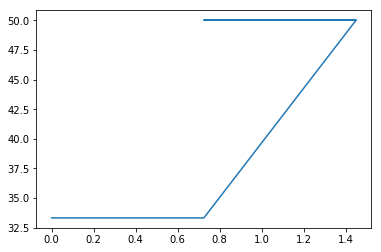

In [98]:
plot_rocs(cen_normal_rate)